# **Ejercicio 2 - Sistemas no lineales y modelado SIR**

## **Teoría**

Responda las siguientes preguntas de forma clara

1. **Compare sistemas lineales y no lineales (p. ej., modelo SIR: $βSI$ vs. recuperación lineal $μ/I$).**
<center>

| **Sistemas Lineales** | **Sistemas No Lineales** |
| --------------------- | ------------------------ |
| Relación directa entre causa y efecto. | Relación dependiente de múltiples variables entre sí.|
| Tienen soluciones analíticas cerradas.| Requieren simulación numérica.|
| Ejemplo: recuperación lineal:  **μ·I**| Ejemplo: infección no lineal: **β·S·I** |
| No generan comportamientos complejos como picos o ciclos. | Pueden generar picos epidémicos y dinámicas impredecibles. |


</center>


2. **Defina la fuerza de infecciónn $(λ = \frac{βcI}{N})$ y su doble interpretación.**

    a. **Riesgo por susceptibilidad**
    - Es la probabilidad de que una persona susceptible entre un contacto con un infectado y se contagie. El resultado depende del número de infectados y de cuántos contactos tiene cada persona.

    b. **Tasa de propagación por infección:**
    - Es la tasa total a la que los individuos susceptibles se convierten en infectados en toda la población.

3. **Explique por qué los sistemas no lineales requieren simulación (no se requieren soluciones de forma cerrada).**

    - Los sistemas no lineales no tienen una solución simple algebráica simple ya que las variables se multiplican entre sí, y la evolución de cada variable depende del valor de todas las demás en cada isntante.

4. **Para un modelo SIR con $R_0 = 3$:**

    a. Explique que es $R_0$
    - Es el número promedio de personas que una persona infectada puede contagiar en una población, en este caso con el valor de **3** significa que en promedio, cada persona infectada transmite la enfermedad a **3** personas al inicio de la epidemia. Para esta variable, si $R_0 > 1$ significa que la epidemia puede crecer, mientras que para $R_0 < 1$ significa que la epidemia tenderá a extinguirse.

    b. Calcule el umbral de inmunidad de grupo.
    - El umbral de inmunidad del grupo se calcula con la siguiente operación:
        $$
        Umbral = 1 - \frac{1}{R_0} = 1 - \frac{1}{3} = \frac{2}{3} = {\bf 66.7\%}
        $$

    c. Dibuje las curvas epidémicas esperadas para $S$, $I$, $R$.

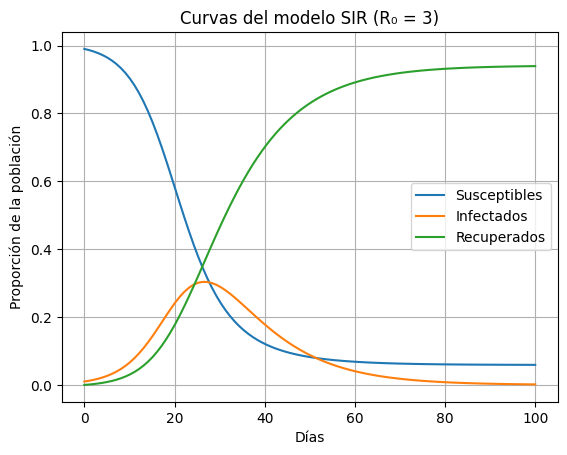

In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

beta = 0.3  # Valor ajustado para que R_0 = 3
gamma = 0.1  # Tasa de recuperación
R0 = beta / gamma  # R_ = 3

# Ecuaciones diferenciales del modelo SIR
def sir_model(state, t, beta, gamma):
    S, I, R = state
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Condiciones iniciales
S0, I0, R0 = 0.99, 0.01, 0.0  # 99% susceptibles, 1% infectados, 0% recuperados
state0 = [S0, I0, R0]

# 100 días de simulación
t = np.linspace(0, 100, 100)

solution = odeint(sir_model, state0, t, args=(beta, gamma))
S, I, R = solution.T

plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Días')
plt.ylabel('Proporción de la población')
plt.title('Curvas del modelo SIR (R₀ = 3)')
plt.legend()
plt.grid()
plt.show()

* En el gráfico se observa que:
  - **S(t)** disminuye
  - **I(t)** crece hasta llegar un pico, para luego bajar
  - **R(t)** crece con el tiempo

  d. ¿Por qué el término $βSI$ crea puntos de inflexión?
    - Esto es porque **S** e **I** cambian constantemente, y como el término es una multiplicación que crea una retroalimentación no líneal: Primero hay muchos susceptibles y pocos infectados, pero la infección crece exponencialmente. Luego al disminuir los susceptibles, el crecimiento se desacelera hasta que comienza a bajar. Es entonces ese cambio el que causa el punto de inflexión.

## **Práctica**
Modele un sistema con retrasos de percepción y visualice las oscilaciones.
Instrucciones
1. Crear:

    a. Un stock "real" que se ajusta a un objetivo (p. ej., 50 unidades).
    
    b. Un stock "percibido" con retraso (p. ej., un retraso de Erlang de 15 días).
2. Utilizar el stock percibido para la retroalimentación (flujo = (objetivo - percibido)/retraso).
3. Simular durante 200 días y representar gráficamente los stocks reales y percibidos.
4. Opcional: Añadir ruido a la percepción y observar la estabilidad.
5. Considere
a. Utilizar numpy.convolve para la implementación del retraso de Erlang.
b. Resaltar las fases de sobrecorrección en los gráficos

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def sistema_con_retraso(objetivo=50, retraso_dias=15, n_etapas=2,
                                delta_t=1.0, duracion=200, ruido=True, 
                                desviacion_ruido=2, mostrar_grafico=True):
    """
    Simula un sistema de control con retraso de percepción (tipo Erlang).
    
    Parámetros:
        objetivo (float): valor objetivo del stock.
        retraso_dias (int): tiempo de retraso de percepción.
        n_etapas (int): número de etapas del retraso (orden de Erlang).
        delta_t (float): paso de tiempo en días.
        duracion (int): duración total de la simulación.
        ruido (bool): si se desea añadir ruido gaussiano.
        desviacion_ruido (float): desviación estándar del ruido.
        mostrar_grafico (bool): si se desea mostrar el gráfico.
    
    Retorna:
        tiempo, stock_real, stock_percibido, flujo
    """

    tiempo = np.arange(0, duracion + delta_t, delta_t)
    n_pasos = len(tiempo)

    stock_real = np.zeros(n_pasos)
    stock_percibido = np.zeros(n_pasos)
    flujo = np.zeros(n_pasos)

    stock_real[0] = 0

    # Crear kernel Erlang
    tiempo_kernel = np.arange(0, retraso_dias + delta_t, delta_t)
    lambda_erlang = n_etapas / retraso_dias
    kernel_erlang = (lambda_erlang ** n_etapas) * (tiempo_kernel ** (n_etapas - 1)) * np.exp(-lambda_erlang * tiempo_kernel)
    kernel_erlang /= np.sum(kernel_erlang)  # Normalizar

    # Simulación
    for t in range(1, n_pasos):
        flujo[t] = (objetivo - stock_percibido[t-1]) / retraso_dias
        stock_real[t] = stock_real[t-1] + flujo[t] * delta_t

        real_cortado = stock_real[:t+1]
        percepcion = np.convolve(real_cortado, kernel_erlang, mode='full')[:t+1]
        stock_percibido[t] = percepcion[-1]

        if ruido:
            stock_percibido[t] += np.random.normal(0, desviacion_ruido)

    errores_cuadrados = (stock_real - objetivo) ** 2
    mse = np.mean(errores_cuadrados)
    rmse = np.sqrt(mse)


    if mostrar_grafico:
        plt.figure(figsize=(10, 6))
        plt.plot(tiempo, stock_real, label='Stock real', linewidth=2)
        plt.plot(tiempo, stock_percibido, label='Stock percibido (retrasado)', linestyle='--')
        plt.axhline(y=objetivo, color='gray', linestyle=':', label='Objetivo')
        plt.title('Sistema con retraso de percepción (Erlang)')
        plt.xlabel('Días')
        plt.ylabel('Valor del stock')
        plt.legend()
        plt.grid(True)

        for t in range(1, n_pasos):
            if (stock_real[t-1] < objetivo and stock_real[t] > objetivo and flujo[t] > 0) or \
               (stock_real[t-1] > objetivo and stock_real[t] < objetivo and flujo[t] < 0):
                plt.axvline(x=tiempo[t], color='red', linestyle='--', alpha=0.3)

        plt.tight_layout()
        plt.show()

    return tiempo, stock_real, stock_percibido, flujo, rmse


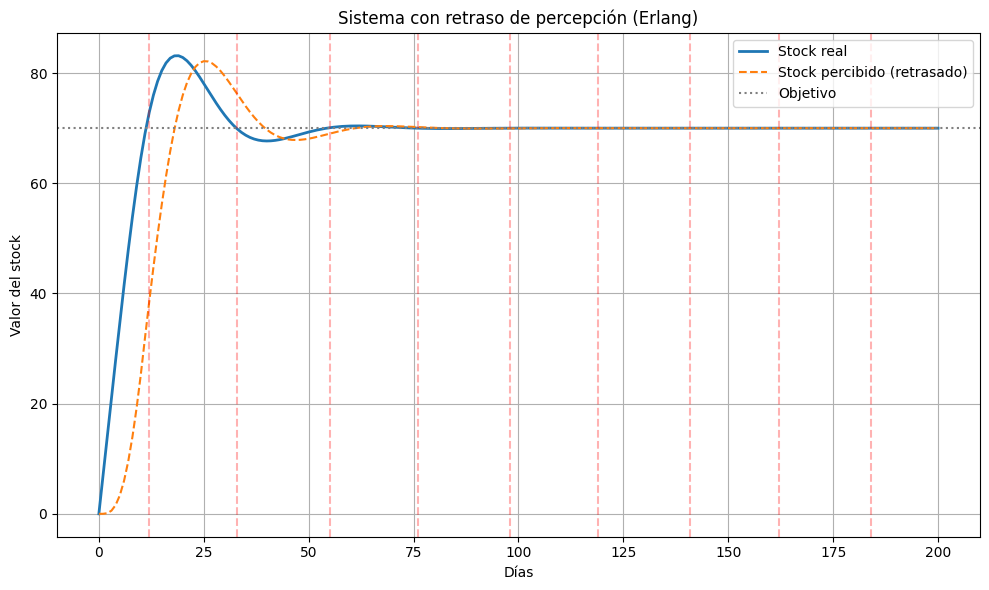

RMSE sin ruido: 10.191365


In [27]:
# Simulación sin ruido y con retraso de 10 días
tiempo, stock_real, stock_percibido, flujo, rmse= sistema_con_retraso(objetivo=70, retraso_dias=10, n_etapas=3, ruido=False)
print(f"RMSE sin ruido: {rmse:-4f}")


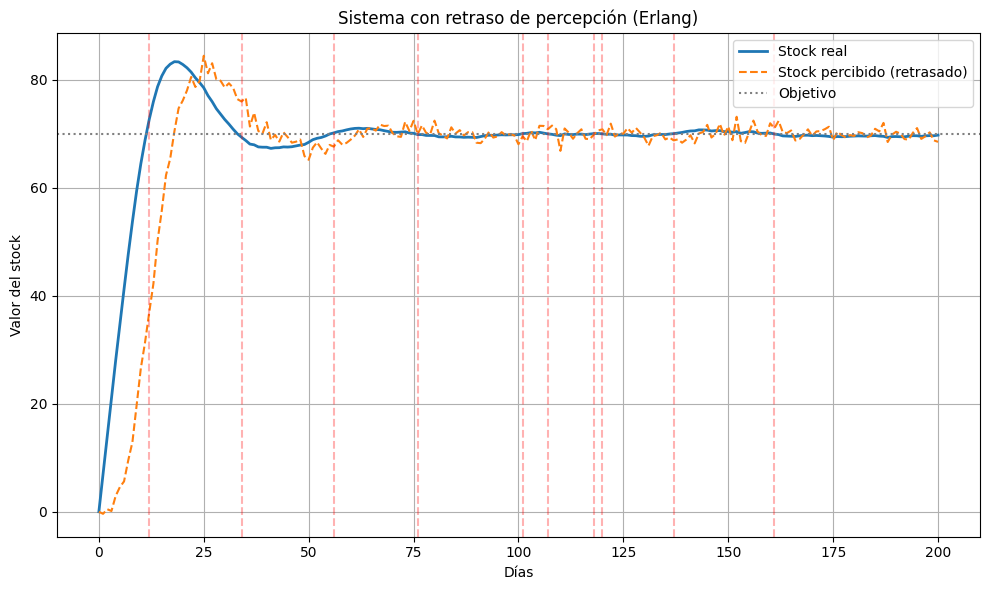

RMSE con ruido: 10.224860


In [28]:
tiempo, stock_real, stock_percibido, flujo, rmse = sistema_con_retraso(objetivo=70, retraso_dias=10, n_etapas=3, ruido=True, desviacion_ruido=1)
print(f"RMSE con ruido: {rmse:-4f}")

In [36]:
for i in range(11):
    if i == 0:
        tiempo, stock_real, stock_percibido, flujo, rmse = sistema_con_retraso(objetivo=70, retraso_dias=10, n_etapas=3, ruido=False, mostrar_grafico = False)
    else:
        tiempo, stock_real, stock_percibido, flujo, rmse = sistema_con_retraso(objetivo=70, retraso_dias=10, n_etapas=3, ruido=True, desviacion_ruido=i, mostrar_grafico = False)
    print(f"RMSE con ruido = {i}: {rmse:-4f}")

RMSE con ruido = 0: 10.191365
RMSE con ruido = 1: 10.159005
RMSE con ruido = 2: 10.255940
RMSE con ruido = 3: 10.241850
RMSE con ruido = 4: 10.205492
RMSE con ruido = 5: 10.282187
RMSE con ruido = 6: 10.312218
RMSE con ruido = 7: 10.555924
RMSE con ruido = 8: 10.593278
RMSE con ruido = 9: 10.855832
RMSE con ruido = 10: 10.625850


### **Análisis de Resultados**


Al comparar el sistema con y sin ruido, se observa que el componente estocástico introducido en la percepción (stock percibido) genera inestabilidad en el sistema de retroalimentación. En el caso sin ruido, el sistema converge suavemente al objetivo gracias a una percepción precisa del estado. Sin embargo, al incluir ruido (`ruido = 1`), la percepción se distorsiona, generando flujos innecesarios y oscilaciones en el stock real. Esto evidencia cómo un sistema con retraso y control proporcional puede ser vulnerable a errores de percepción, y cómo el ruido puede amplificar esos errores, afectando la eficiencia y estabilidad del sistema.

Posteriormente, al analizar el **error cuadrático medio (RMSE)** para distintos niveles de ruido (desde 1 hasta 9) se observa que, en general, el **RMSE** tiende a aumentar conforme se incrementa el ruido. No obstante, este aumento no es estrictamente lineal ni constante. Dado que el ruido se modela mediante una distribución normal, cada simulación genera una realización aleatoria distinta. Por ello, es posible que, en ocasiones, un nivel de ruido mayor produzca un **RMSE** ligeramente menor que uno con menor ruido, debido a una secuencia de valores más favorables. Este comportamiento refleja la naturaleza estocástica del sistema e indica la importancia de realizar múltiples simulaciones para obtener una evaluación más robusta del impacto del ruido.

### **Prompt utilizado**
Necesito un código en Python que simule un sistema de stock con retroalimentación proporcional hacia un valor objetivo, incorporando un retraso de percepción modelado con una distribución Erlang (orden ajustable). El sistema debe permitir activar o desactivar un componente de ruido gaussiano en la percepción, y todos los parámetros deben ser fácilmente modificables. Necesito que utilices numpy.convolve. Luego también necesito que me des explicaciones sobre en que parte se aplica la teoría de un sistema con retrasos de percepción.

### **Por qué funcionó este prompt**
Este prompt es específico y directo, ya que se define el tipo de sistema con el timpo de retraso esperado, se solicita que sea como una función con parámetros modificable. Además se solicitó una justificación del código para no solo comprender el código, sino que también asegurarme que el **LLM** está aplicando lo deseado.